In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [5]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [6]:
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [10]:
import datetime as dt

In [11]:
type(df['Timestamp'])

pandas.core.series.Series

In [12]:
df['Timestamp'].dt.month

0      3
1      4
2      3
3      1
4      6
      ..
995    2
996    4
997    2
998    3
999    6
Name: Timestamp, Length: 1000, dtype: int64

In [13]:
df['time']=df['Timestamp'].dt.time

In [14]:
df['day']=df['Timestamp'].dt.day
df['month']=df['Timestamp'].dt.month
df['year']=df['Timestamp'].dt.year

In [15]:
df['hour']=df['Timestamp'].dt.hour
df['min']=df['Timestamp'].dt.minute

In [16]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,time,day,month,year,hour,min
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,00:53:11,27,3,2016,0,53
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,01:39:02,4,4,2016,1,39
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20:35:42,13,3,2016,20,35
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,02:31:19,10,1,2016,2,31
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,03:36:18,3,6,2016,3,36


In [17]:
df.drop(['Ad Topic Line', 'City','Country','Timestamp'],axis=1,inplace=True)


In [18]:
df.drop('time',axis=1,inplace=True)

In [19]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'day', 'month', 'year',
       'hour', 'min'],
      dtype='object')

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,day,month,year,hour,min
0,68.95,35,61833.90,256.09,0,0,27,3,2016,0,53
1,80.23,31,68441.85,193.77,1,0,4,4,2016,1,39
2,69.47,26,59785.94,236.50,0,0,13,3,2016,20,35
3,74.15,29,54806.18,245.89,1,0,10,1,2016,2,31
4,68.37,35,73889.99,225.58,0,0,3,6,2016,3,36


In [21]:
cols=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'day', 'month', 
       'hour', 'min']

In [22]:
df['year'].value_counts()

2016    1000
Name: year, dtype: int64

In [23]:
len(cols)

10

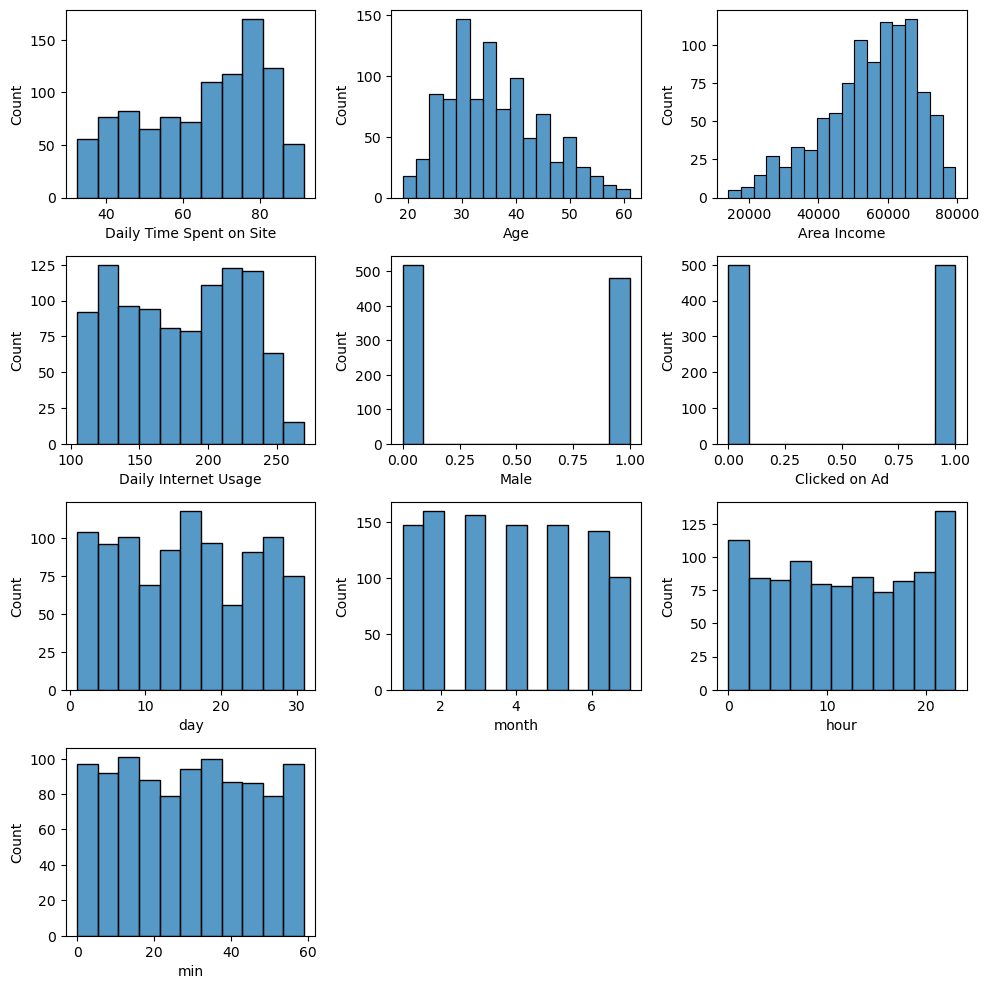

In [24]:
plot_no=1
plt.figure(figsize=(10,10))
for i in cols:
    if plot_no<=11:
        plt.subplot(4,3,plot_no)
        sns.histplot(df[i])
        plt.xlabel(i)
        plt.ylabel('Count')
    plot_no+=1
plt.tight_layout()

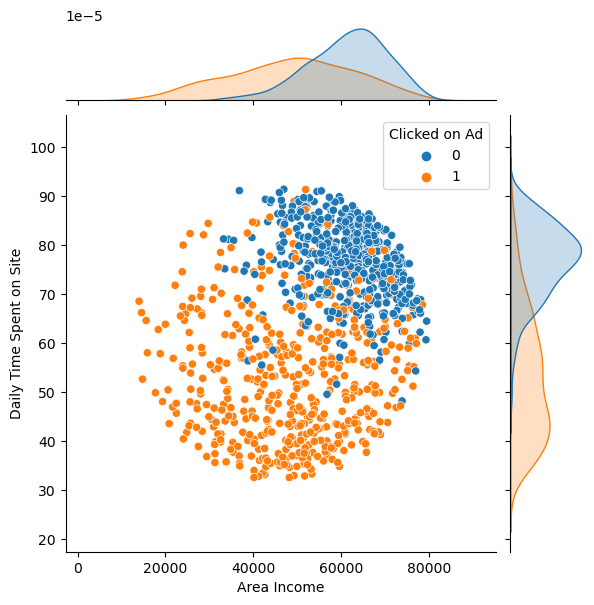

In [25]:
sns.jointplot(y='Daily Time Spent on Site',x='Area Income',hue='Clicked on Ad',data=df)

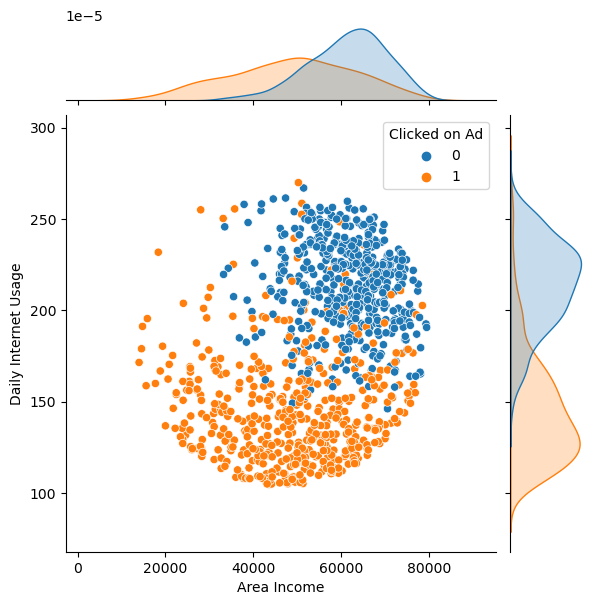

In [26]:
sns.jointplot(y='Daily Internet Usage',x='Area Income',hue='Clicked on Ad',data=df)

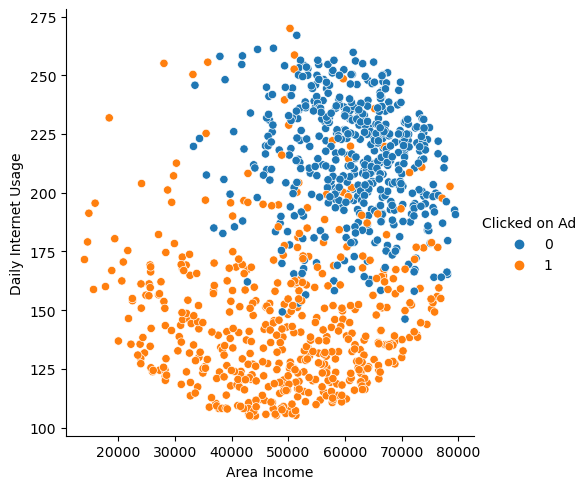

In [27]:
sns.relplot(y='Daily Internet Usage',x='Area Income',hue='Clicked on Ad',data=df)

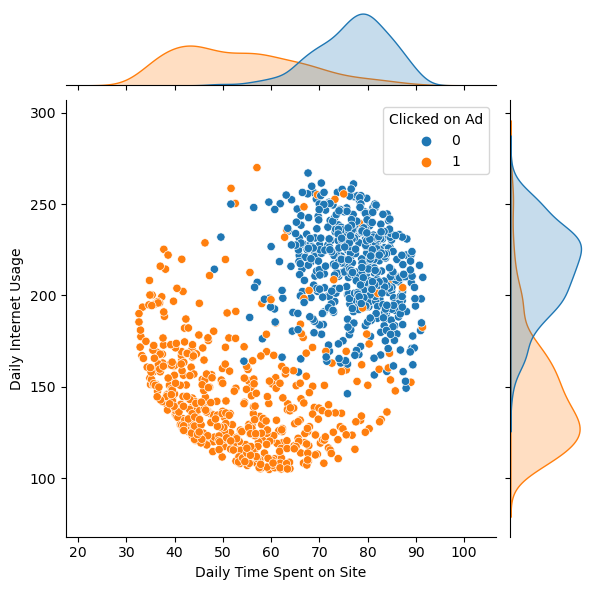

In [28]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',hue='Clicked on Ad',data=df)

In [29]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,day,month,year,hour,min
0,68.95,35,61833.90,256.09,0,0,27,3,2016,0,53
1,80.23,31,68441.85,193.77,1,0,4,4,2016,1,39
2,69.47,26,59785.94,236.50,0,0,13,3,2016,20,35
3,74.15,29,54806.18,245.89,1,0,10,1,2016,2,31
4,68.37,35,73889.99,225.58,0,0,3,6,2016,3,36


In [30]:
df.drop('year',axis=1,inplace=True)

In [31]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,day,month,hour,min
0,68.95,35,61833.90,256.09,0,0,27,3,0,53
1,80.23,31,68441.85,193.77,1,0,4,4,1,39
2,69.47,26,59785.94,236.50,0,0,13,3,20,35
3,74.15,29,54806.18,245.89,1,0,10,1,2,31
4,68.37,35,73889.99,225.58,0,0,3,6,3,36


In [ ]:
#sns.pairplot(df,hue='Clicked on Ad')

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'day', 'month', 'hour',
       'min'],
      dtype='object')

In [34]:
X=df.drop(['month','Clicked on Ad','min'],axis=1)

In [35]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,day,hour
0,68.95,35,61833.90,256.09,0,27,0
1,80.23,31,68441.85,193.77,1,4,1
2,69.47,26,59785.94,236.50,0,13,20
3,74.15,29,54806.18,245.89,1,10,2
4,68.37,35,73889.99,225.58,0,3,3
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,11,21
996,51.30,45,67782.17,134.42,1,22,2
997,51.63,51,42415.72,120.37,1,1,17
998,55.55,19,41920.79,187.95,0,24,2


In [36]:
y=df['Clicked on Ad']

In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

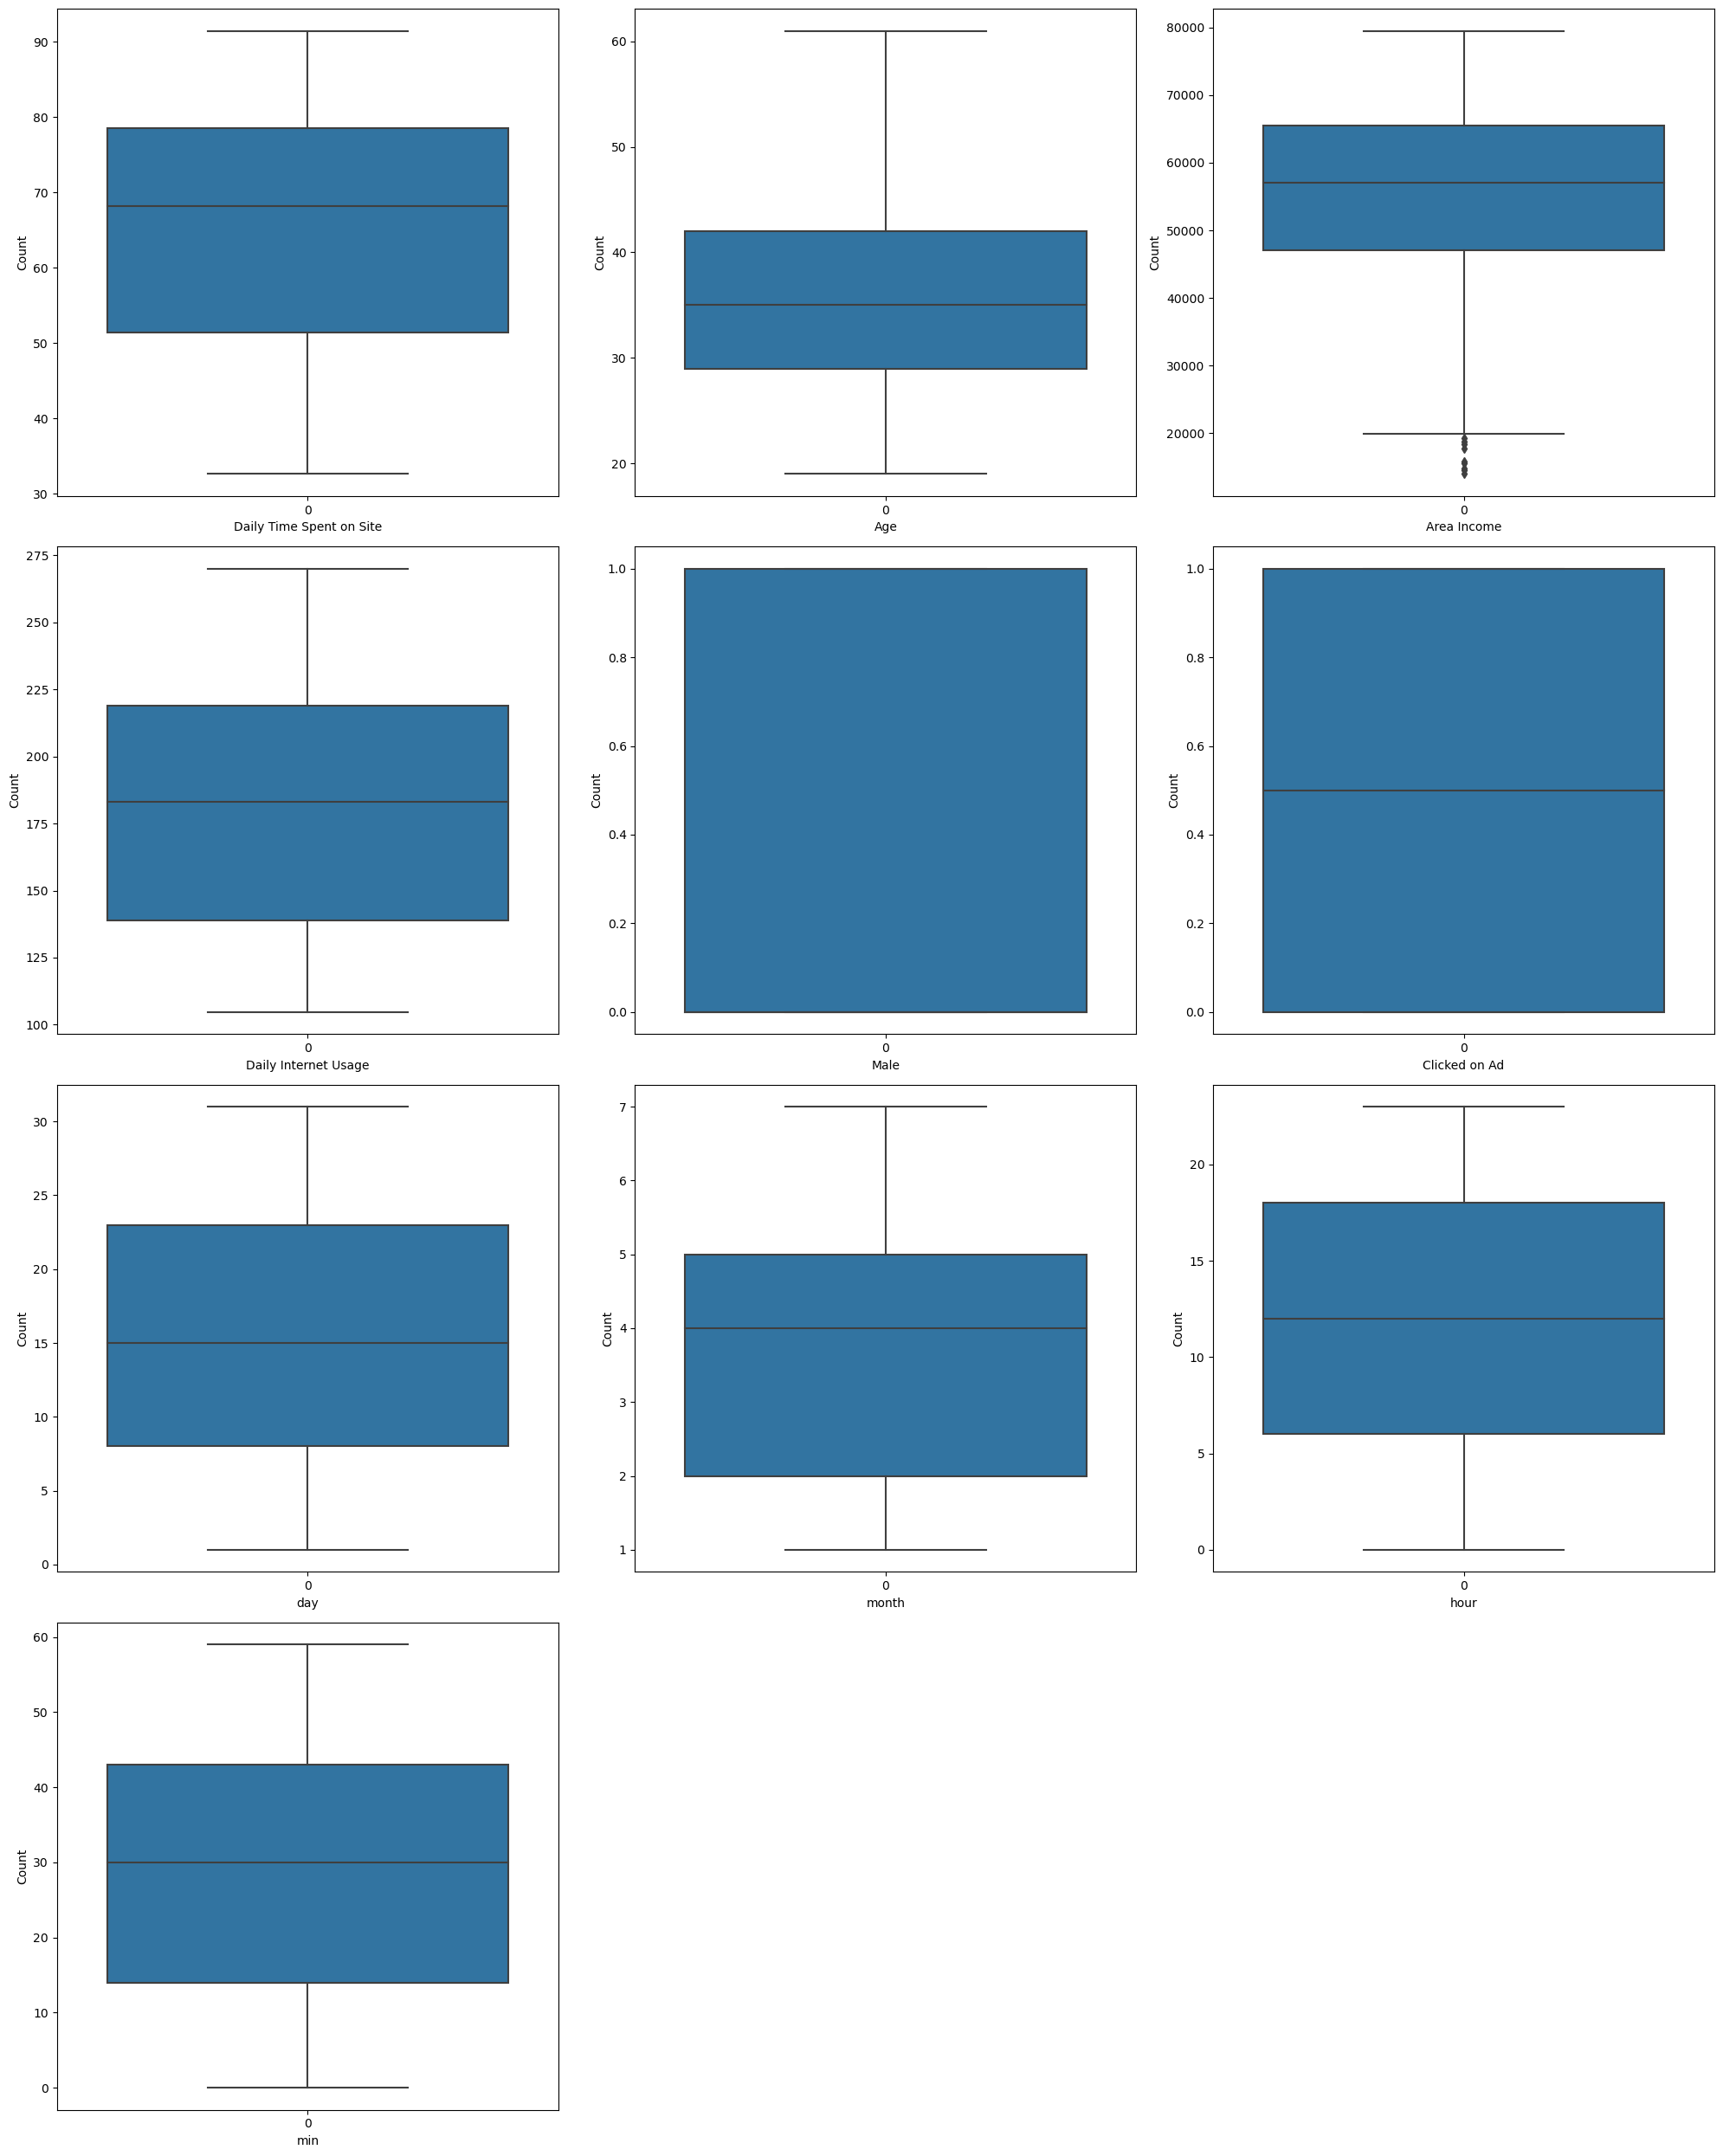

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber+=1
plt.tight_layout()

In [39]:
scaler=MinMaxScaler()

In [40]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.61788203, 0.38095238, 0.73047247, ..., 0.        , 0.86666667,
        0.        ],
       [0.80962094, 0.28571429, 0.83137522, ..., 1.        , 0.1       ,
        0.04347826],
       [0.62672106, 0.16666667, 0.69920032, ..., 0.        , 0.4       ,
        0.86956522],
       ...,
       [0.32347442, 0.76190476, 0.43395874, ..., 1.        , 0.        ,
        0.73913043],
       [0.39010709, 0.        , 0.4264012 , ..., 0.        , 0.76666667,
        0.08695652],
       [0.2109468 , 0.16666667, 0.24247537, ..., 0.        , 0.06666667,
        0.91304348]])

In [41]:
X_final=pd.DataFrame(X_scaled,columns=X.columns)

In [42]:
X_final.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,day,hour
0,0.617882,0.380952,0.730472,0.916031,0.0,0.866667,0.000000
1,0.809621,0.285714,0.831375,0.538746,1.0,0.100000,0.043478
2,0.626721,0.166667,0.699200,0.797433,0.0,0.400000,0.869565
3,0.706272,0.238095,0.623160,0.854280,1.0,0.300000,0.086957
4,0.608023,0.380952,0.914568,0.731323,0.0,0.066667,0.130435


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 7)
(700,)
(300, 7)
(300,)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model=LogisticRegression()

In [48]:
log_model.fit(X_train,y_train)

C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred=log_model.predict(X_test)

In [50]:
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [51]:
y_test[:10]

521    1
737    1
740    1
660    1
411    0
678    0
626    0
513    1
859    0
136    1
Name: Clicked on Ad, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [53]:
print(confusion_matrix(y_test,y_pred))

[[140   6]
 [ 24 130]]


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [55]:
print(accuracy_score(y_test,y_pred)*100)

90.0


In [56]:
y_prob=log_model.predict_proba(X_test)

In [57]:
y_prob

array([[6.86227993e-01, 3.13772007e-01],
       [3.65431762e-03, 9.96345682e-01],
       [1.56493850e-02, 9.84350615e-01],
       [1.24566147e-02, 9.87543385e-01],
       [9.62087341e-01, 3.79126594e-02],
       [7.11441093e-01, 2.88558907e-01],
       [9.55731591e-01, 4.42684094e-02],
       [5.44084954e-03, 9.94559150e-01],
       [7.36252036e-01, 2.63747964e-01],
       [6.10351109e-02, 9.38964889e-01],
       [9.78388080e-01, 2.16119200e-02],
       [1.62568778e-01, 8.37431222e-01],
       [7.83723921e-03, 9.92162761e-01],
       [9.34964082e-01, 6.50359185e-02],
       [1.46070542e-01, 8.53929458e-01],
       [2.44326314e-03, 9.97556737e-01],
       [3.31420290e-03, 9.96685797e-01],
       [5.34629192e-02, 9.46537081e-01],
       [8.49096006e-01, 1.50903994e-01],
       [6.22488948e-03, 9.93775111e-01],
       [8.47123346e-01, 1.52876654e-01],
       [2.05533267e-02, 9.79446673e-01],
       [1.33581307e-02, 9.86641869e-01],
       [9.93419771e-01, 6.58022906e-03],
       [9.889381

In [58]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [59]:
param_grid=[{'penalty':['l1', 'l2', 'elasticnet', 'None'],
            'C':np.logspace(-4,4,20),
            'solver':['bfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'max_iter':[100,1000,2500,5000]}]

In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
clf=GridSearchCV(log_model,param_grid=param_grid,cv=3,verbose=1,n_jobs=2)

In [63]:
best_clf=clf.fit(X_train,y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4080 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
399 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\MANOHAR\anac

C:\Users\MANOHAR\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\MANOHAR\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [64]:
clf.best_params_

{'C': 0.004832930238571752,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [65]:
rev_lod_model=LogisticRegression(C=0.004832930238571752, solver='newton-cg')

In [66]:
rev_lod_model.fit(X_train,y_train)

C:\Users\MANOHAR\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\MANOHAR\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.004832930238571752, solver='newton-cg')

In [67]:
rev_y_pred=rev_lod_model.predict(X_test)

In [68]:
rev_y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [69]:
print(confusion_matrix(y_test,rev_y_pred))

[[142   4]
 [  7 147]]


In [70]:
print(classification_report(y_test,rev_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
p